In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = 'librispeech'

our_local = pd.read_csv(f'./ours-{dataset}-local.csv')
baseline_local = pd.read_csv(f'./baseline-{dataset}-local.csv')
our_remote = pd.read_csv(f'./ours-{dataset}-remote.csv')
baseline_remote = pd.read_csv(f'./baseline-{dataset}-remote.csv')

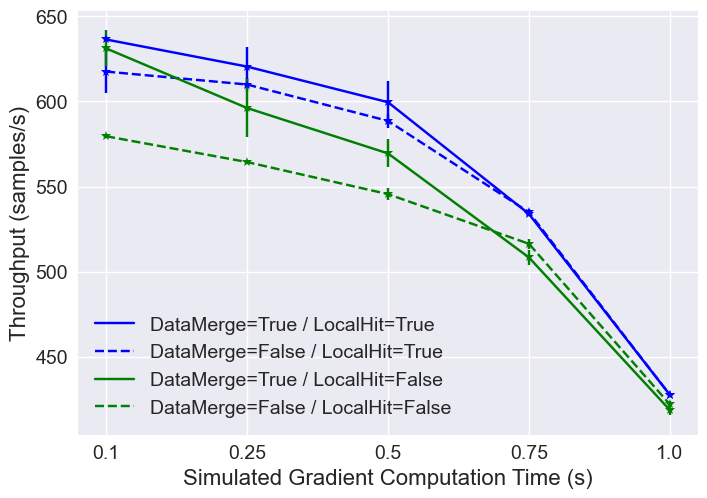

In [35]:
plt.style.use('seaborn')


sim_compute_time = our_local['sim_compute_time'].to_numpy()

x = np.arange(len(sim_compute_time))
plt.plot(x, our_local['throughput'], label='DataMerge=True / LocalHit=True', color='b')
plt.errorbar(x, our_local['throughput'], yerr = our_local['throughput_std'], fmt ='*', capsize=3, color='b')
plt.plot(x, baseline_local['throughput'], label='DataMerge=False / LocalHit=True', linestyle='dashed', color='b')
plt.errorbar(x, baseline_local['throughput'], yerr = baseline_local['throughput_std'], fmt ='*', capsize=3, color='b')

plt.plot(x, our_remote['throughput'], label='DataMerge=True / LocalHit=False', color='g')
plt.errorbar(x, our_remote['throughput'], yerr = our_remote['throughput_std'], fmt ='*', capsize=3, color='g')
plt.plot(x, baseline_remote['throughput'], label='DataMerge=False / LocalHit=False', linestyle='dashed', color='g')
plt.errorbar(x, baseline_remote['throughput'], yerr = baseline_remote['throughput_std'], fmt ='*', capsize=3, color='g')

plt.xticks(x, sim_compute_time, fontsize=14)
plt.yticks(fontsize=14)
plt.gca().set_xlabel('Simulated Gradient Computation Time (s)', fontsize=16)
plt.gca().set_ylabel('Throughput (samples/s)', fontsize=16)
plt.legend(fontsize=14)
plt.savefig(f"{dataset}-rlt.png", dpi=300)
plt.show()

In [36]:
100 * (our_local - baseline_local) / baseline_local

,sim_compute_time,threadpool_size,block_size,io_time,processing_time,load_time,compute_time,completion_time,memory,throughput,num_batches,throughput_std
0,0.0,133.333333,1266.666667,-36.008451,13.527204,-6.202378,10.158399,-2.991328,11.151035,3.054816,0.0,-86.605524
1,0.0,33.333333,1933.333333,-21.660831,13.254688,-4.742742,3.433117,-1.677946,2.796507,1.728036,0.0,206.058605
2,0.0,66.666667,1900.000000,-30.747784,14.386835,-10.186146,2.628485,-1.806822,12.512845,1.865734,0.0,192.235867
3,0.0,0.000000,0.000000,-5.047387,2.063887,1.307857,0.009768,0.185364,-10.732687,-0.185483,0.0,-32.166833
4,0.0,0.000000,0.000000,7.008784,-5.109438,0.462986,-0.049403,0.006366,2.610185,-0.006441,0.0,-8.761307


In [37]:
100 * (our_remote - baseline_remote) / baseline_remote

,sim_compute_time,threadpool_size,block_size,io_time,processing_time,load_time,compute_time,completion_time,memory,throughput,num_batches,throughput_std
0,0.0,133.333333,15900.000000,-57.611053,30.860045,-15.188201,20.121124,-8.164302,17.279691,8.910390,0.0,1648.102689
1,0.0,33.333333,17233.333333,-57.239083,40.033076,-15.049573,12.282397,-5.278153,21.571878,5.628798,0.0,1185.548929
2,0.0,33.333333,5900.000000,-63.440552,51.702977,-23.237884,7.903260,-4.194651,34.047877,4.389711,0.0,124.037370
3,0.0,0.000000,9933.333333,-52.608353,29.057958,0.773670,1.728829,1.580730,3.839262,-1.553274,0.0,48.065588
4,0.0,0.000000,1966.666667,-20.206379,4.862516,1.993466,0.637570,0.794543,4.244564,-0.785575,0.0,83.208527
